# Sementic Segmentation

# O'zi yurar mashinalar uchun model

In [1]:
import torch
import fastai

print(torch.__version__)
print(fastai.__version__)

2.1.0+cu121
2.7.14


In [2]:
from fastai.vision.all import *

path = untar_data(URLs.CAMVID_TINY)

#label getter funksiyasi
def label_getter(file):
  return path/'labels'/f'{file.stem}_P{file.suffix}'

#dataloaders
dls = SegmentationDataLoaders.from_label_func(path, bs=8,fnames=get_image_files(path/'images'),
                                             label_func=label_getter,
                                             codes=np.loadtxt(path/'codes.txt',dtype=str))

#fine_tuning
learn = unet_learner(dls,resnet34)
learn.fine_tune(12)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 140MB/s]


epoch,train_loss,valid_loss,time
0,2.896331,2.372815,00:03


epoch,train_loss,valid_loss,time
0,1.702800,1.541928,00:01
1,1.479769,1.281146,00:01
2,1.342261,1.106428,00:01
3,1.259243,1.203123,00:01
4,1.178110,1.084349,00:01
5,1.085719,0.892931,00:01
6,0.998922,0.817618,00:02
7,0.915990,0.736035,00:02
8,0.843674,0.717833,00:02
9,0.782418,0.713899,00:02


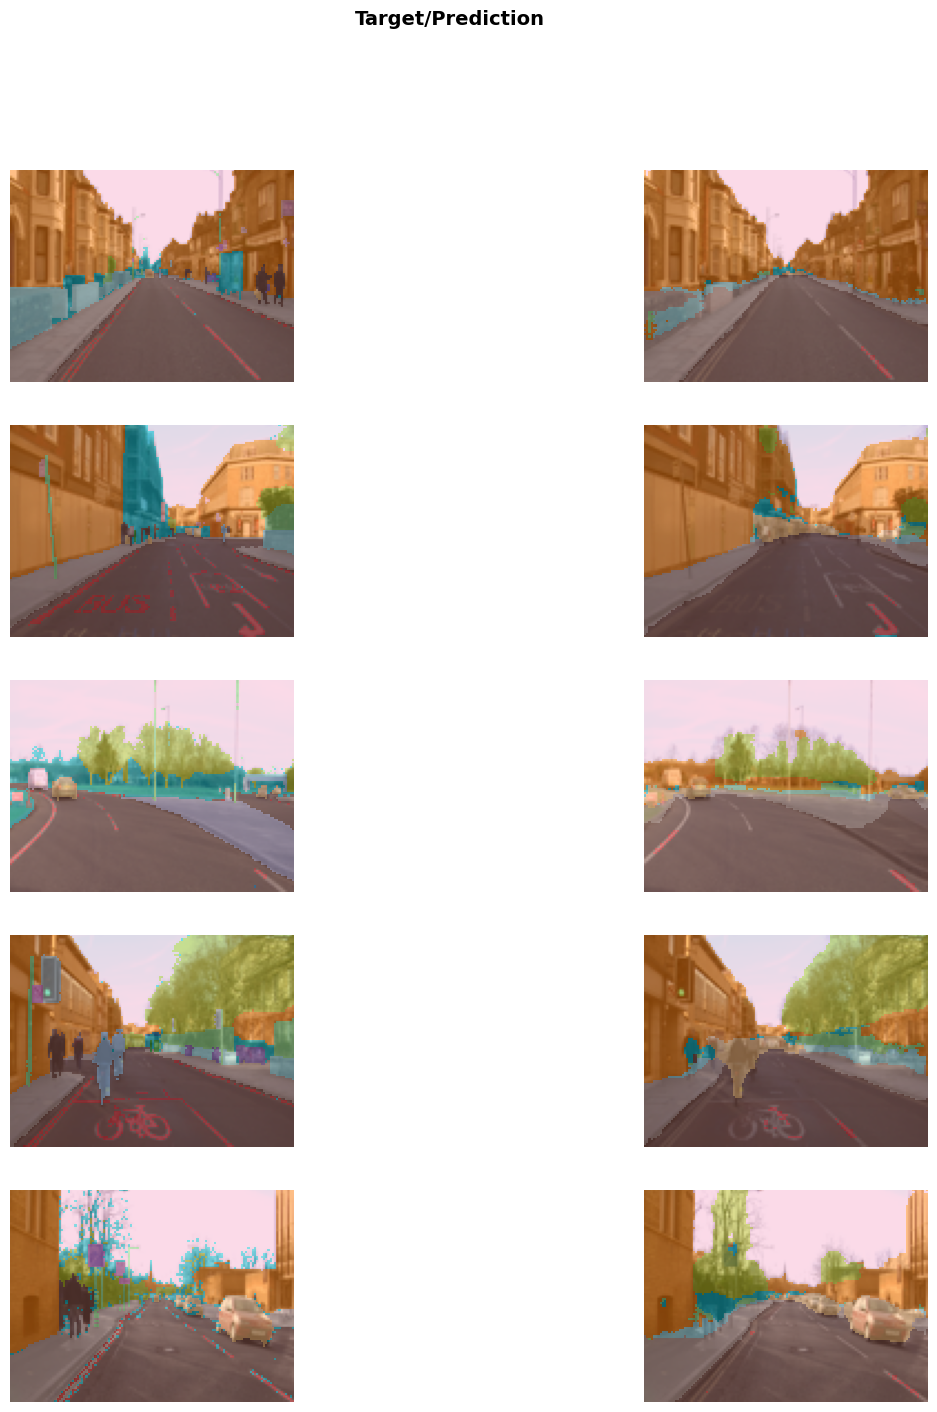

In [3]:
learn.show_results(max_n=5,figsize=(15,16))